In [2]:
!pip install sklearn-genetic-opt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 5.9 MB/s eta 0:00:00


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

In [4]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [5]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.830416	0.119342   	0.935092   	0.562187   
1  	17    	0.898501	0.0336143  	0.935082   	0.831078   
2  	19    	0.922628	0.0141299  	0.935082   	0.89791    
3  	19    	0.931724	0.00503765 	0.938775   	0.922088   
4  	18    	0.93581 	0.00206951 	0.938775   	0.933147   
5  	20    	0.936928	0.00184668 	0.938775   	0.935082   
6  	19    	0.938036	0.00147734 	0.938775   	0.935082   
7  	18    	0.938775	0          	0.938775   	0.938775   
8  	19    	0.938775	0          	0.938775   	0.938775   
9  	20    	0.938775	0          	0.938775   	0.938775   
10 	19    	0.938775	0          	0.938775   	0.938775   
11 	20    	0.938775	0          	0.938775   	0.938775   
12 	18    	0.938775	0          	0.938775   	0.938775   
13 	20    	0.938775	0          	0.938775   	0.938775   
14 	17    	0.938775	0          	0.938775   	0.938775   
15 	19    	0.938775	0          	0.938775   	0.938775   
16 	17    	0.938775	0          	0.938775   	0.93

0.9356120826709062

/usr/local/lib/python3.12/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


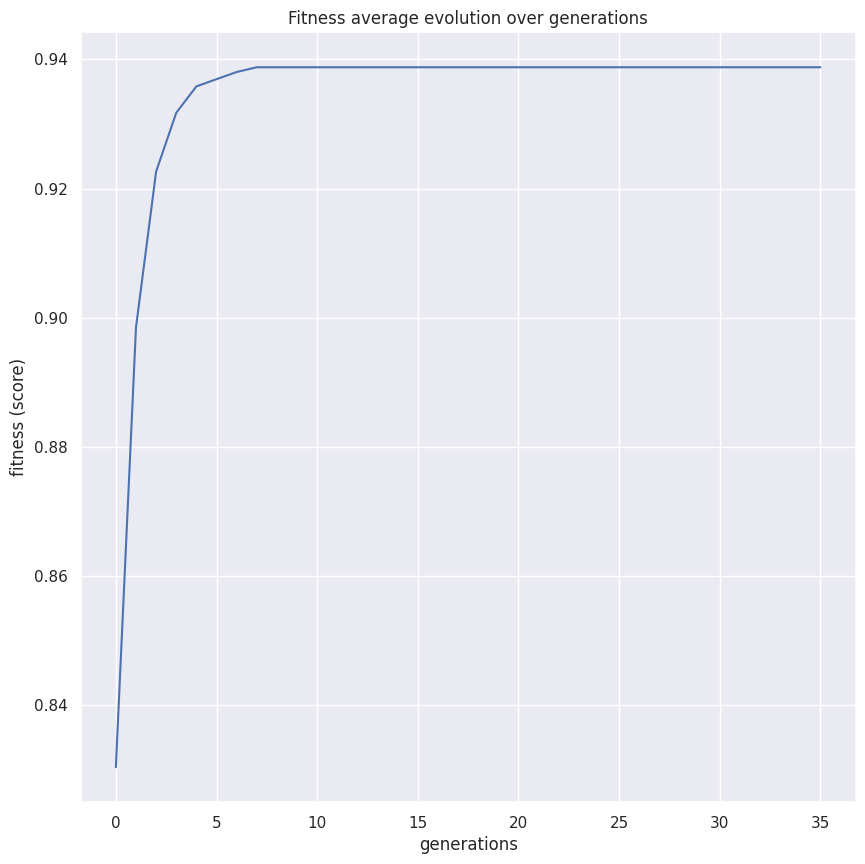

In [6]:
plot_fitness_evolution(evolved_estimator)
plt.show()

#Explicación del código (lo que entendí con ayuda de ciertas herramientas)
Dentro del *machine learning* existen muchos tipos de algoritmos o programas los cuales sirven para organizar datos de entrada y otorgarles una categoría o etiqueta predefinida, lo cual aporta al programa: la capacidad de tomar decisiones categóricas, además de la identificación y predicción de datos nuevos.

Con este contexto, el objetivo del código presentado en este archivo es encontrar la mejor configuración para un modelo de clasificación llamado *Random Forest*, para esto, se uso un algoritmo basado en la evolución biológica.

La explicación se dividirá en los siguientes puntos:
  1. **Instalación de la biblioteca *sklearn-genetic-opt***: Esta biblioteca permite optimizar los hiperparámetros de los modelos de *Machine learning* de *scikit-learn* utilizando algoritmos genéticos.

  2. **Carga de datos**: Aquí es donde se carga un conjunto de datos de imágenes.

  3. **Preprocesamiento**: Las imágenes cargadas son convertidas en filas de números para que el programa pueda leerlos y asi entrenarse.

  4. **Etiquetar**: Se le asigna la etiqueta o valor correcto a cada imagen. Lo que indica su respectiva respuesta correcta.

  5. **División de datos**: Los datos son separados en 2 grupos, donde la mayor cantidad de los mismos son destinados para que el modelo se entrene y aprenda y el resto se destinan a pruebas para evaluar el rendimiento final.

  6. **Definición de modelo base**: Se inicializa el modelo *Random Forest* o árboles de decisión para clasificar cada dato (como un diagrama de flujo con decisiones de sí o no).

  7. **Selección y configuración**: Se optimiza el modelo configurando los parámetros de los datos. Posteriormente se seleccionan 10 modelos del *random forest*, se mide su aptitud y el proceso de realiza 35 veces. Con estos datos, se cruzan y aplican pequeñas "mutaciones" para asegurarse que solo las mejores configuraciones pasarán a la siguiente generación.

  8. **Entrenamiento y evaluación final**: Se entrena el *random forest* con la mejor configuración encontrada despues de las 35 generaciones. Luego se busca que el programa califique los datos de prueba, que no habian sido vistos antes. Finalmente mide la precisión del modelo indicando el porcentaje de datos que clasificó correctamente.

  9. **Visualización de datos**: muestra un gráfico que demuestra como el modelo fue mejorando la precisión a lo largo de las 35 generaciones evolutivas.